In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a longitude and latitude combination
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# pair them together
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


617

## Get the city Weather Data 

In [6]:
# Import Dependencies and Initialize an empty list and Counters.
import requests

# Import the APi Key
from config import weather_api_key

from datetime import datetime

In [7]:
# Starting URL for for weather map API call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c45661bf65d270f100a19490c6037b66


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters 
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | voh
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | sant feliu de guixols
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | nizhnyaya tavda
Processing Record 8 of Set 1 | kastamonu
Processing Record 9 of Set 1 | andros
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | qasigiannguit
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | zhangye
Processing Record 21 of Set 1 | new norfolk
Proces

Processing Record 37 of Set 4 | cape town
Processing Record 38 of Set 4 | nouakchott
Processing Record 39 of Set 4 | alappuzha
Processing Record 40 of Set 4 | comodoro rivadavia
Processing Record 41 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 4 | lethem
Processing Record 43 of Set 4 | ishigaki
Processing Record 44 of Set 4 | gogrial
Processing Record 45 of Set 4 | acton
Processing Record 46 of Set 4 | popondetta
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | kachug
Processing Record 49 of Set 4 | grand gaube
Processing Record 50 of Set 4 | hvolsvollur
Processing Record 1 of Set 5 | kununurra
Processing Record 2 of Set 5 | port hardy
Processing Record 3 of Set 5 | cedar city
Processing Record 4 of Set 5 | tianpeng
Processing Record 5 of Set 5 | nerchinskiy zavod
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | luderitz
Processing Record 8 of Set 5 | inverell
Processing Record 9 of Set 5 | arraial do cabo
P

Processing Record 27 of Set 8 | palenque
Processing Record 28 of Set 8 | dingle
Processing Record 29 of Set 8 | victoria
Processing Record 30 of Set 8 | naryan-mar
Processing Record 31 of Set 8 | bathsheba
Processing Record 32 of Set 8 | bagdarin
Processing Record 33 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 34 of Set 8 | colac
Processing Record 35 of Set 8 | foz
Processing Record 36 of Set 8 | aden
Processing Record 37 of Set 8 | hof
Processing Record 38 of Set 8 | necochea
Processing Record 39 of Set 8 | qinhuangdao
Processing Record 40 of Set 8 | coquimbo
Processing Record 41 of Set 8 | vrangel
Processing Record 42 of Set 8 | sinnamary
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | chuy
Processing Record 45 of Set 8 | bagrami
Processing Record 46 of Set 8 | broome
Processing Record 47 of Set 8 | amot
Processing Record 48 of Set 8 | road town
Processing Record 49 of Set 8 | yining
Processing Record 50 of Set 8 | aquiraz
Processi

Processing Record 15 of Set 12 | skjervoy
Processing Record 16 of Set 12 | kiomboi
Processing Record 17 of Set 12 | thilogne
City not found. Skipping...
Processing Record 18 of Set 12 | tofield
Processing Record 19 of Set 12 | nampula
Processing Record 20 of Set 12 | tongliao
Processing Record 21 of Set 12 | chibuto
Processing Record 22 of Set 12 | deputatskiy
Processing Record 23 of Set 12 | abu kamal
Processing Record 24 of Set 12 | araouane
Processing Record 25 of Set 12 | longlac
City not found. Skipping...
Processing Record 26 of Set 12 | yangambi
Processing Record 27 of Set 12 | taoudenni
Processing Record 28 of Set 12 | ormara
Processing Record 29 of Set 12 | boyarka
Processing Record 30 of Set 12 | miyazu
Processing Record 31 of Set 12 | linqing
Processing Record 32 of Set 12 | vila franca do campo
Processing Record 33 of Set 12 | eyl
Processing Record 34 of Set 12 | inirida
Processing Record 35 of Set 12 | opuwo
Processing Record 36 of Set 12 | viedma
Processing Record 37 of S

In [9]:
# Get the total number of cities
len(city_data)


572

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,75.99,56,75,5.75,AU,2021-02-01 00:46:51
1,Voh,-20.9667,164.7000,82.20,65,94,7.96,NC,2021-02-01 00:54:31
2,Nanortalik,60.1432,-45.2371,33.15,88,100,4.83,GL,2021-02-01 00:44:17
3,Jamestown,42.0970,-79.2353,28.99,74,90,13.80,US,2021-02-01 00:46:39
4,Sant Feliu De Guixols,41.7833,3.0333,51.01,93,0,4.61,ES,2021-02-01 00:54:32
5,Barrow,71.2906,-156.7887,-14.80,76,90,11.50,US,2021-02-01 00:43:22
6,Nizhnyaya Tavda,57.6731,66.1725,6.12,95,0,5.23,RU,2021-02-01 00:54:32
7,Kastamonu,41.5000,33.6667,32.95,93,97,2.93,TR,2021-02-01 00:47:09
8,Andros,37.8333,24.9333,64.00,66,98,13.00,GR,2021-02-01 00:53:50
9,Rikitea,-23.1203,-134.9692,79.54,61,35,6.33,PF,2021-02-01 00:46:43


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-02-01 00:46:51,-42.8794,147.3294,75.99,56,75,5.75
1,Voh,NC,2021-02-01 00:54:31,-20.9667,164.7000,82.20,65,94,7.96
2,Nanortalik,GL,2021-02-01 00:44:17,60.1432,-45.2371,33.15,88,100,4.83
3,Jamestown,US,2021-02-01 00:46:39,42.0970,-79.2353,28.99,74,90,13.80
4,Sant Feliu De Guixols,ES,2021-02-01 00:54:32,41.7833,3.0333,51.01,93,0,4.61
...,...,...,...,...,...,...,...,...,...
567,Ekhabi,RU,2021-02-01 00:55:45,53.5102,142.9671,-15.16,81,0,20.62
568,Neuquen,AR,2021-02-01 00:52:45,-38.9516,-68.0591,66.20,59,0,7.83
569,Umm Lajj,SA,2021-02-01 00:46:56,25.0213,37.2685,70.03,39,0,8.30
570,Humberto De Campos,BR,2021-02-01 00:55:45,-2.5983,-43.4611,77.61,88,100,5.70


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Weather Data

### Plot Latitude vs. Temperature 

In [13]:
# Extract the relevenat fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

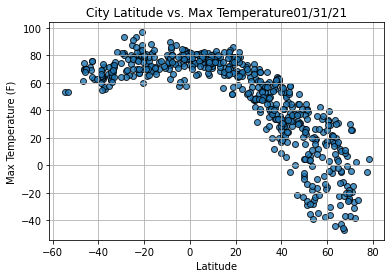

In [14]:
# Import the time module 
import time

# Build the scatter plot for latitude vs. max temperature 
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

#### Plot Latitude vs. Humidity

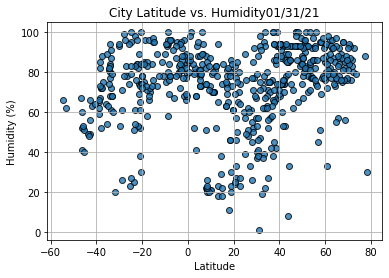

In [15]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

#### Plot Latitude vs. Cloudiness

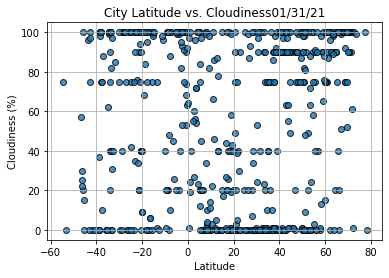

In [16]:
# Build the scatter plot for latitude and cloudiness.
plt.scatter(lats, 
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

#### Plot Latitude vs. Wind Speed 

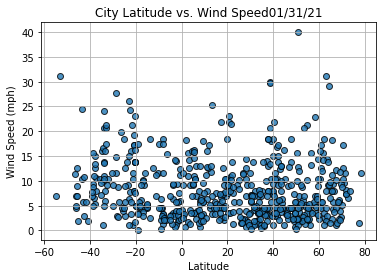

In [17]:
# Build the scatter plots for latitude vs. windspeed.
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()

# Create a Linear Regression Function 

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Using the loc method to access a group of rows and columns. **row = df.loc[row_Index]**
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2021-02-01 00:53:34
Lat                      -34.5322
Lng                       20.0403
Max Temp                    62.01
Humidity                       81
Cloudiness                     99
Wind Speed                   1.01
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#### Perform Linear Regression on the Maximum Temp.


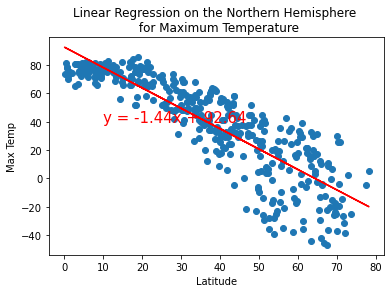

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere \n for Maximum Temperature'), 'Max Temp',(10,40))

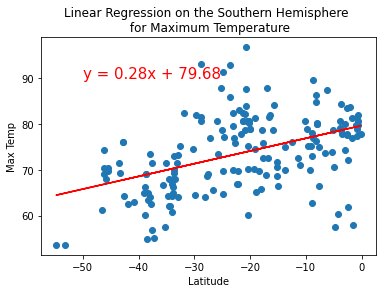

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature'), 'Max Temp',(-50,90))

#### Find the Correlation between latitude and Percent Humidity

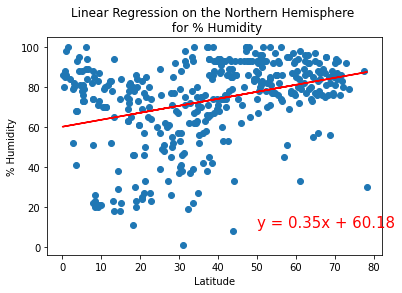

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity'), '% Humidity',(50,10))

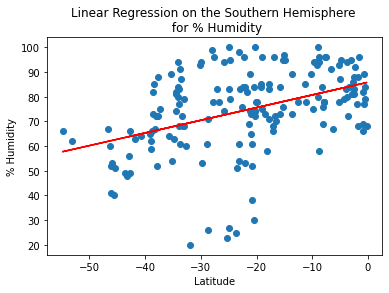

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for % Humidity'), '% Humidity',(-50,15))

#### Perform Regression on the Percent Cloudiness for the Northern Hemisphere.

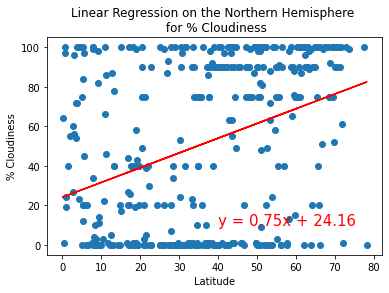

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness'),
                       '% Cloudiness',(40,10))

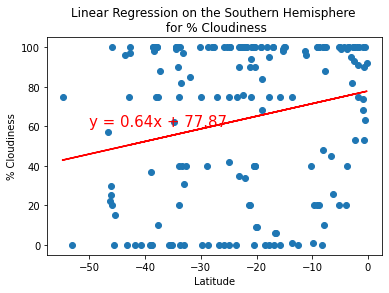

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for % Cloudiness'), '% Cloudiness',(-50,60))


#### Find the Correlation between latitude and wind speed

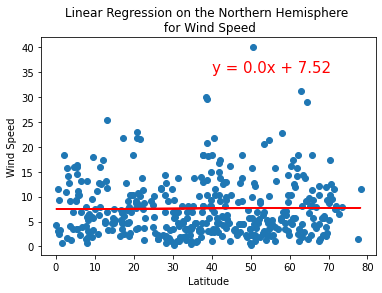

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere \n for Wind Speed'), 'Wind Speed',(40,35))


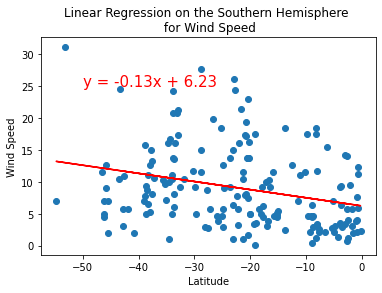

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed'), 'Wind Speed',(-50,25))
